<a href="https://colab.research.google.com/github/jajapuramshivasai/DAI-101/blob/main/DAI_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("debashis74017/lic-stock-price-data")

print("Path to dataset files:", path)

100%|██████████| 671k/671k [00:00<00:00, 1.58MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/debashis74017/lic-stock-price-data/versions/4


In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
"""

path :: /root/.cache/kagglehub/datasets/debashis74017/lic-stock-price-data/versions/4/LICI - Daily data.csv

"""

In [3]:
csv_path = "/root/.cache/kagglehub/datasets/debashis74017/lic-stock-price-data/versions/4/LICI - Daily data.csv"

In [4]:
data = pd.read_csv(csv_path)

In [ ]:
# data['Date'] = [dates.replace(' GMT+0530 (India Standard Time)', '') for dates in data['Date']]
# data['Date'] = pd.to_datetime(data['Date'])
# data.head()

In [ ]:
data.head()

In [5]:
data['Date'] = [dates.replace(' GMT+0530 (India Standard Time)', '') for dates in data['Date']]
data['Date'] = pd.to_datetime(data['Date'], format='%a %b %d %Y %H:%M:%S') # Specifying the correct format
data.head()

,Date,Open,High,Low,Close
0,2022-05-17,872.00,918.95,860.00,875.25
1,2022-05-18,885.55,891.00,874.10,876.35
2,2022-05-19,867.00,867.00,838.00,840.85
3,2022-05-20,848.55,856.80,825.00,826.15
4,2022-05-23,826.15,852.70,803.65,816.85


# Exploratory Data Analysis

In [6]:
data.head()

,Date,Open,High,Low,Close
0,2022-05-17,872.00,918.95,860.00,875.25
1,2022-05-18,885.55,891.00,874.10,876.35
2,2022-05-19,867.00,867.00,838.00,840.85
3,2022-05-20,848.55,856.80,825.00,826.15
4,2022-05-23,826.15,852.70,803.65,816.85


In [7]:
data.tail()

,Date,Open,High,Low,Close
93,2022-09-28,627.75,627.75,620.25,621.45
94,2022-09-29,623.90,626.90,618.00,619.55
95,2022-09-30,620.25,626.40,617.00,621.65
96,2022-10-03,622.00,625.00,619.25,620.60
97,2022-10-04,624.00,631.80,624.00,629.30


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    98 non-null     datetime64[ns]
 1   Open    98 non-null     float64       
 2   High    98 non-null     float64       
 3   Low     98 non-null     float64       
 4   Close   98 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.0 KB


In [9]:
data.describe()

,Date,Open,High,Low,Close
count,98,98.000000,98.000000,98.000000,98.000000
mean,2022-07-24 21:03:40.408163328,701.538265,708.165306,694.244388,698.081122
min,2022-05-17 00:00:00,620.250000,625.000000,617.000000,619.550000
25%,2022-06-20 06:00:00,666.000000,673.025000,659.112500,664.687500
50%,2022-07-23 12:00:00,680.950000,687.525000,676.000000,678.400000
75%,2022-08-29 18:00:00,707.987500,714.437500,701.437500,706.812500
max,2022-10-04 00:00:00,885.550000,918.950000,874.100000,876.350000
std,NaN,61.256379,63.310209,58.585598,59.471556


#Univariate Analysis


## on open price

In [10]:
# Descriptive statistics
open_price_stats = data['Open'].describe()
print(open_price_stats)

# Additional metrics
median = data['Open'].median()
variance = data['Open'].var()
skewness = data['Open'].skew()
kurtosis = data['Open'].kurtosis()

print(f"Median: {median}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


count     98.000000
mean     701.538265
std       61.256379
min      620.250000
25%      666.000000
50%      680.950000
75%      707.987500
max      885.550000
Name: Open, dtype: float64
Median: 680.95
Variance: 3752.3440103618755
Skewness: 1.4470780724563166
Kurtosis: 1.2379997625735188


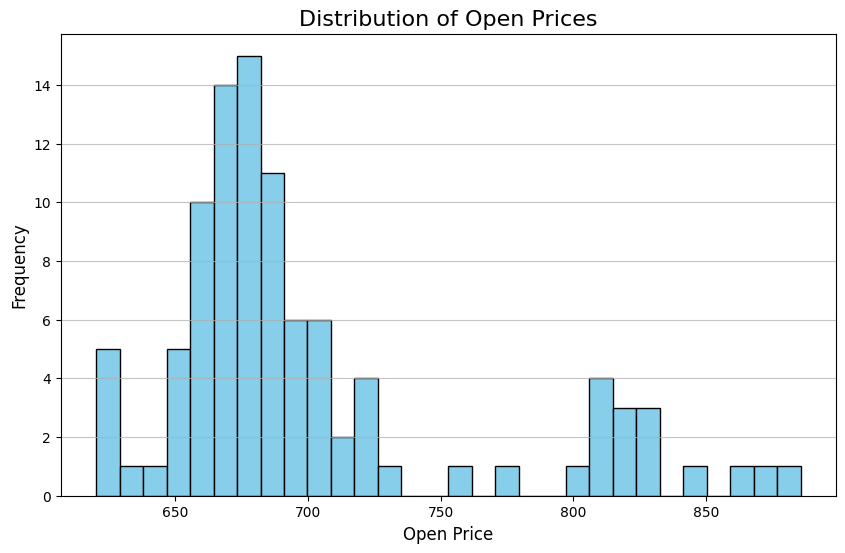

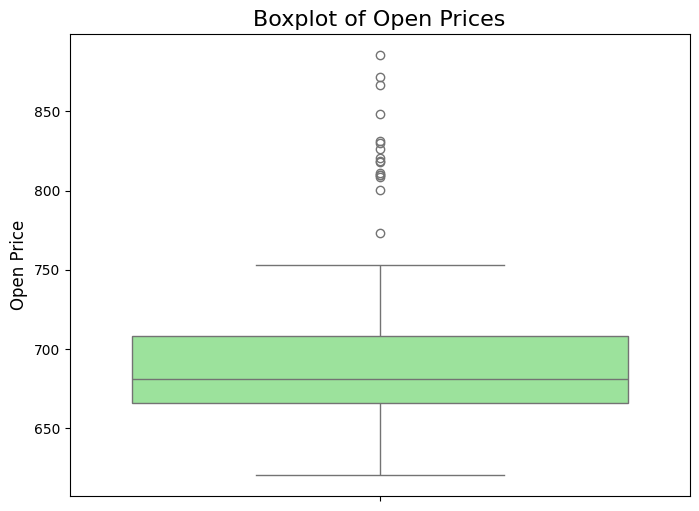

<ipython-input-11-b7aa1f16a5b6>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Open'], shade=True, color='salmon')


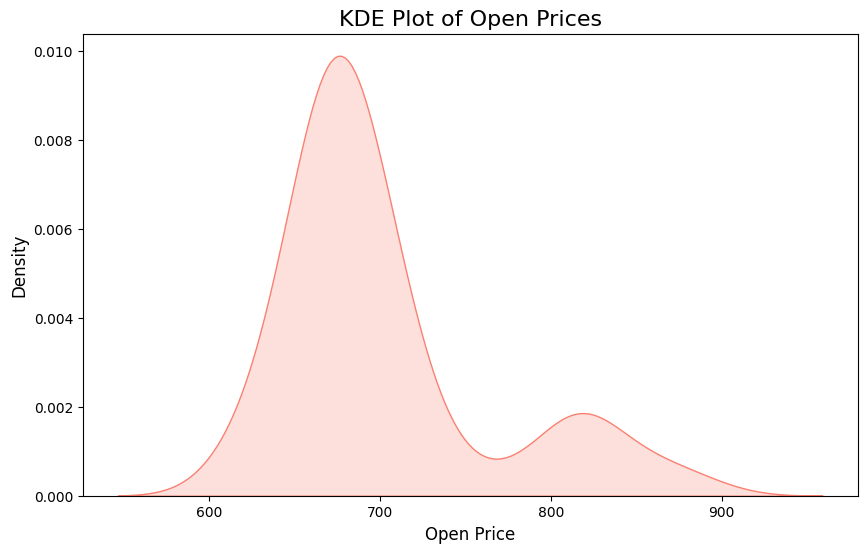

In [11]:

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.hist(data['Open'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Open Prices', fontsize=16)
plt.xlabel('Open Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Open'], color='lightgreen')
plt.title('Boxplot of Open Prices', fontsize=16)
plt.ylabel('Open Price', fontsize=12)
plt.show()

# KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Open'], shade=True, color='salmon')
plt.title('KDE Plot of Open Prices', fontsize=16)
plt.xlabel('Open Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()


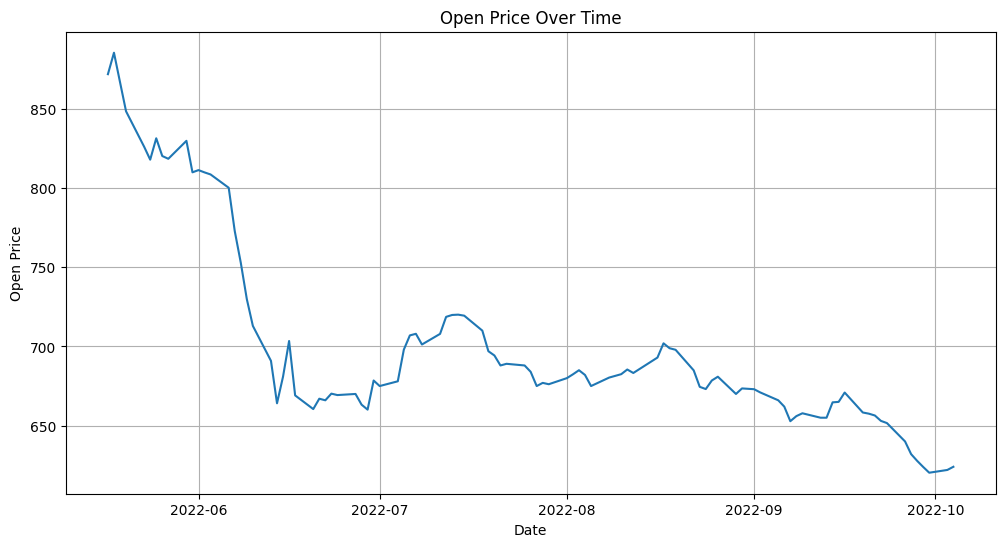

In [12]:
# prompt: plot the open price

import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded as in the previous code

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price Over Time')
plt.grid(True)
plt.show()


## on closing price

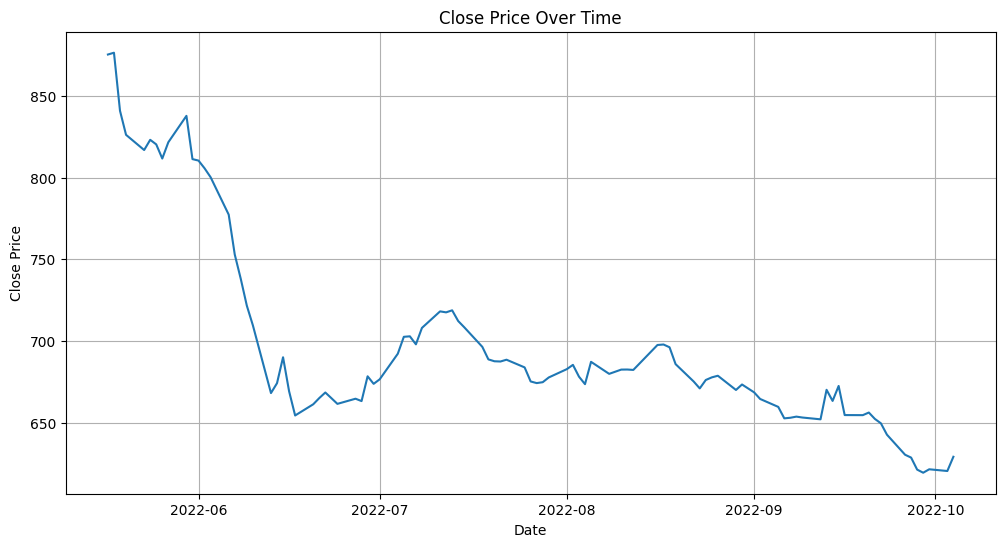

In [13]:


# Assuming 'data' DataFrame is already loaded as in the previous code

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.grid(True)
plt.show()


## on highest price of each day

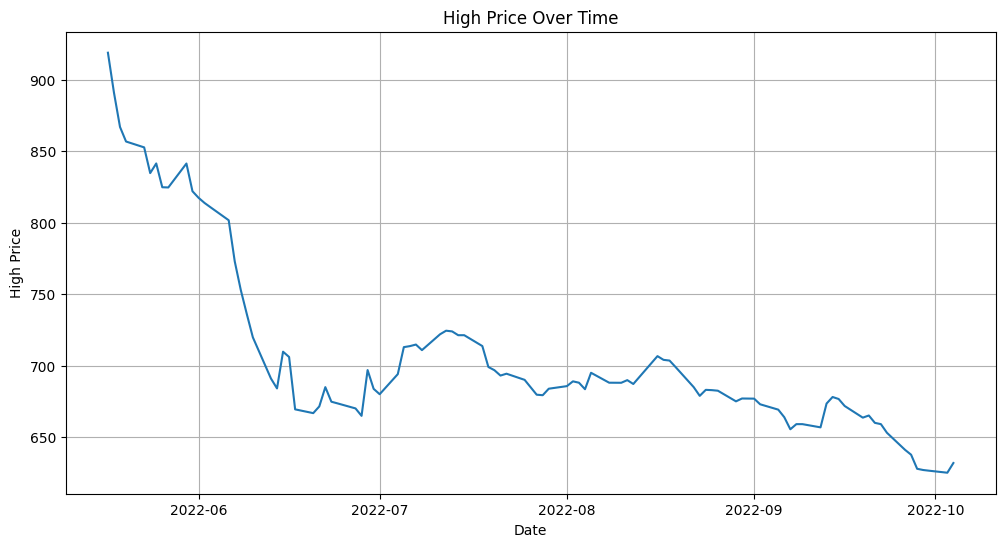

In [14]:


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High Price Over Time')
plt.grid(True)
plt.show()


## on lowest price of each day

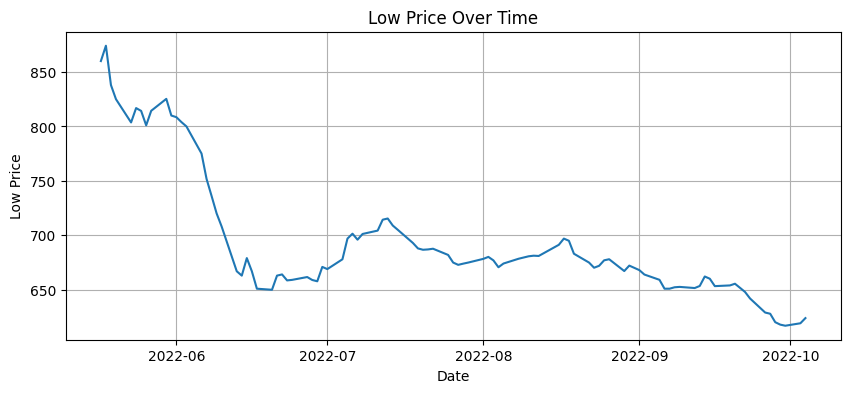

In [15]:


plt.figure(figsize=(10, 4))
plt.plot(data['Date'], data['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low Price Over Time')
plt.grid(True)
plt.show()


# Multivariate Analysis

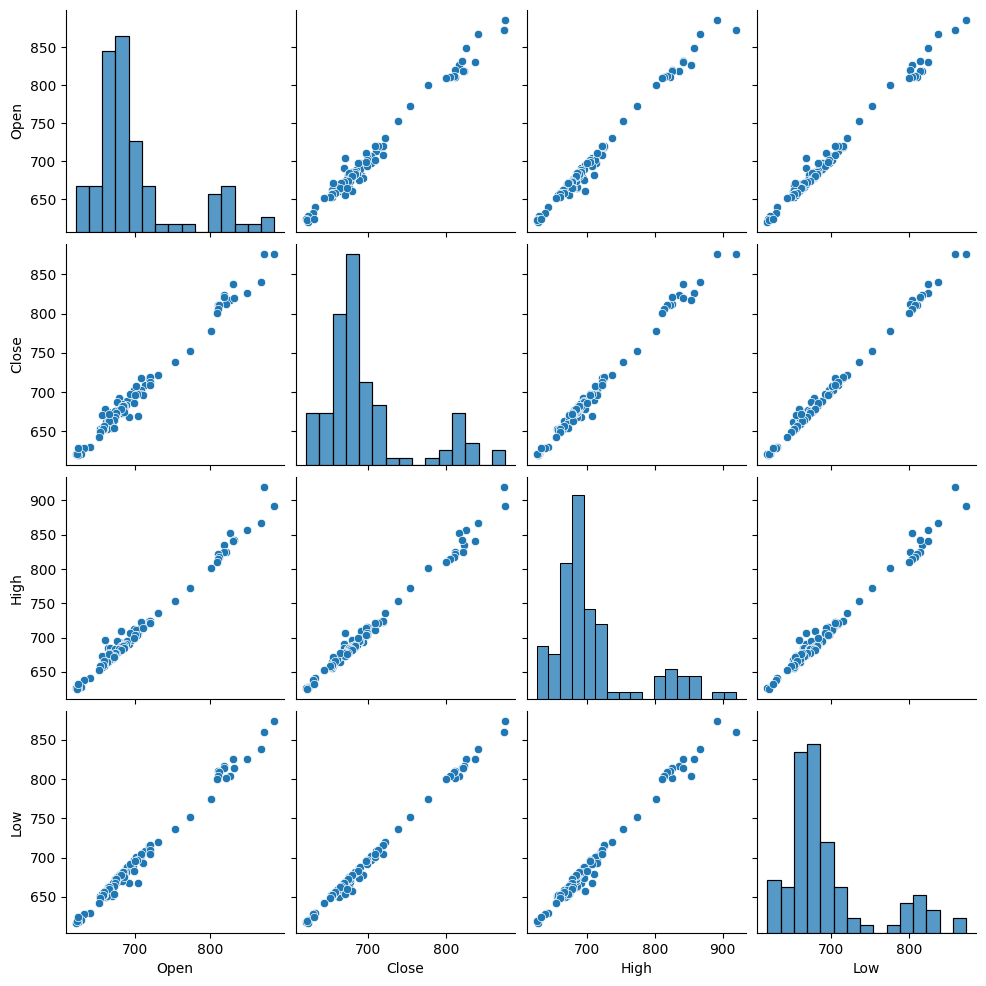

In [16]:


# Assuming 'data' DataFrame is already loaded as in the previous code
sns.pairplot(data[['Open', 'Close', 'High', 'Low']])
plt.show()


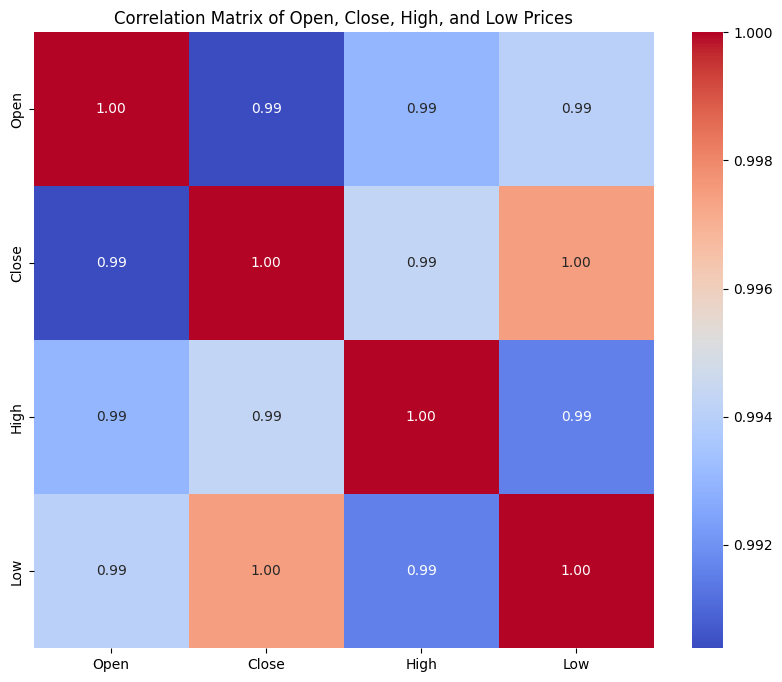

In [17]:


# Assuming 'data' DataFrame is already loaded as in the previous code
correlation_matrix = data[['Open', 'Close', 'High', 'Low']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Open, Close, High, and Low Prices')
plt.show()
